#                                                  Resume Analysis

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#pip install pyresparser

In [4]:
import PyPDF2
from PyPDF2 import PdfFileReader,PdfFileWriter

In [5]:
file='C:\\Users\\admin\\Desktop\\Imarticus\\Sample Resume\\Dharnika.pdf'
file_1=PdfFileReader(file)
file_1

In [6]:
with open('C:/Users/admin/Desktop/Imarticus/Sample Resume/Dharnika.txt','w',encoding="utf8")as f:
    for page_num in range(file_1.numPages):
        print('Page: {0}'.format(page_num))
        pagefile=file_1.getPage(page_num)
        try:
            txtfile=pagefile.extractText()
            print(''.center(100,'-'))
        except:
            pass
        else:
            f.write('Page{0}\n'.format(page_num+1))
            f.write(''.center(100,'-'))
            f.write(txtfile)
    f.close()

Page: 0
----------------------------------------------------------------------------------------------------
Page: 1
----------------------------------------------------------------------------------------------------
Page: 2
----------------------------------------------------------------------------------------------------


In [7]:
#pip install textract

In [8]:
pdfFileObj = open('C:/Users/admin/Desktop/Imarticus/Sample Resume/Dharnika.pdf', 'rb')

# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

# printing number of pages in pdf file
print(pdfReader.numPages)

# creating a page object
pageObj = pdfReader.getPage(0)

# extracting text from page
print(pageObj.extractText())

# closing the pdf file object
pdfFileObj.close()


3
DHARNIHA V  
934478079 
Dharni332@gmail.com
  
www.linkedin.com/in/dharniha-v-558238212  
OBJECTIVE  
 
To be a self-motivated individual with knack for getting things done.Looking to kickstart my career in an 
organization that can help me realize my potential and grow.  
EDUCATION QUALIFICATION  
June 2019
-
Present
          M.KUMARASAMY COLLEGE OF ENGINEERING, KARUR   
  
                                       Bachelor of  Engineering-Electronics and Communication Engineering (8.5 CGPA )  
June 2016-April 2019    
KURINJI HIGHER SECONDARY SCHOOL, NAMAKKAL 
  
                                        
HSC  Bio-Maths (78.1%)  
                                        SSLC (96.6%)  
 
PROJECTS  
• 
Rain Detection Sensor 
 
To detect rainfall before it falls to save the rain  
• 
Health Monitoring System Embedded  In Walking Stick
                                                        
      To monitor the patients heartbeat and alerts if heart beats abnormal   
• 
Car Booking Women S

In [9]:
#pip install docx2txt

In [10]:
import docx2txt

In [11]:
extract_skills=docx2txt.process('C:\\Users\\admin\\Desktop\\Imarticus\\Sample Resume\\skills.docx')
resume=docx2txt.process('C:\\Users\\admin\\Desktop\\Imarticus\\Sample Resume\\Dharnika.docx')
print(resume)

Page1

----------------------------------------------------------------------------------------------------DHARNIHA V  

934478079 

Dharni332@gmail.com

  

www.linkedin.com/in/dharniha-v-558238212  

OBJECTIVE  

 

To be a self-motivated individual with knack for getting things done.Looking to kickstart my career in an 

organization that can help me realize my potential and grow.  

EDUCATION QUALIFICATION  

June 2019

-

Present

          M.KUMARASAMY COLLEGE OF ENGINEERING, KARUR   

  

                                       Bachelor of  Engineering-Electronics and Communication Engineering (8.5 CGPA )  

June 2016-April 2019    

KURINJI HIGHER SECONDARY SCHOOL, NAMAKKAL 

  

                                        

HSC  Bio-Maths (78.1%)  

                                        SSLC (96.6%)  

 

PROJECTS  

• 

Rain Detection Sensor 

 

To detect rainfall before it falls to save the rain  

• 

Health Monitoring System Embedded  In Walking Stick

                      

In [12]:
txt=[extract_skills,resume]

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
model=CountVectorizer()
cv=model.fit_transform(txt)

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_cv=cosine_similarity(cv)
print(similarity_cv)
print(' Dharnika Resume Matches By: '+str(similarity_cv[1][0]*100)+ '%')

[[1.         0.08794081]
 [0.08794081 1.        ]]
 Dharnika Resume Matches By: 8.794080883518104%


#### Reading Files From Folder

In [15]:
import os
from os import listdir
from os.path import isfile, join

In [16]:
file_path='C:\\Users\\admin\\Desktop\\Imarticus\\Resume'

In [17]:
myfiles = [os.path.join(file_path, f) for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))]
myfiles


['C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\DEEPIKA.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\Gowri.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\KAVIYA.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\Sowmya.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\Yash Gupta.pdf']

In [18]:
import collections
def pdfextract(file):
    pdf_file = open(file, 'rb')
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    number_of_pages = read_pdf.getNumPages()
    c = collections.Counter(range(number_of_pages))
    for i in c:
        #page
        page = read_pdf.getPage(i)
        page_content = page.extractText()
    return (page_content.encode('utf-8'))

In [19]:
li=[]
for i in myfiles:
    print(i)
    li.append(pdfextract(i))   

C:\Users\admin\Desktop\Imarticus\Resume\DEEPIKA.pdf
C:\Users\admin\Desktop\Imarticus\Resume\Gowri.pdf
C:\Users\admin\Desktop\Imarticus\Resume\KAVIYA.pdf
C:\Users\admin\Desktop\Imarticus\Resume\Sowmya.pdf
C:\Users\admin\Desktop\Imarticus\Resume\Yash Gupta.pdf


In [20]:
df=pd.DataFrame(li,columns=['resume_data'])

In [21]:
df.reset_index(inplace=True)
    

In [22]:
df.rename(columns={'index':'resume_id'},inplace=True)
df

,resume_id,resume_data
0,0,b' \n\n \n \nCOURSE COMPLETION\n \n\n \...
1,1,b' \n\n \n\n\n\nProject \n \n\n\xe2\x80\xa2\n...
2,2,b' \n\nProject Title: \xe2\x80\x9c\nBlack Frid...
3,3,b'Completed Business English preliminary exam ...
4,4,b' \n\nCompany: \nInsplore Consultants pvt. lt...


In [23]:
import re
import string
def cleandata(txt):
    txt=str(txt)
    txt=txt.lower()
    txt=txt.strip()
    txt = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F1E0-\U0001F1FF"  
                           "]+", flags=re.UNICODE).sub(' ', txt)
    txt=re.compile('\d+').sub(' ', txt)
    txt=re.compile('<.*?>').sub(' ',txt)
    txt=re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', txt)
    txt=re.compile('\s+').sub(' ', txt)
    txt=re.sub('\\b[^(aiouvAIOUV)]{1} \\b',' ',txt)
    txt=txt.strip()
    return txt

In [24]:
j=0
for i in df["resume_data"]:
    df["resume_data"].iloc[j]=cleandata(i)
    j+=1

In [25]:
df

,resume_id,resume_data
0,0,ncourse completion nnew india learnathon ...
1,1,nproject xe xa nmini shopping website ...
2,2,nproject title xe nblack friday da ntaset ...
3,3,completed business english preliminary exam ni...
4,4,ncompany ninsplore consultants pvt ltd napri...


In [26]:
import gensim 
import string
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from gensim.models.phrases import Phraser, Phrases

In [27]:
x=[]
for line in df['resume_data']:
    tokens=word_tokenize(line)
    tok=[w.lower() for w in tokens]
    table=str.maketrans('','',string.punctuation)
    strpp=[w.translate(table) for w in tok]
    words=[word for word in strpp if word.isalpha()]
    stop_words=set(stopwords.words('english'))
    words=[w for w in words if not w in stop_words]
    x.append(words)
    print(x)
 

[['ncourse', 'completion', 'nnew', 'india', 'learnathon', 'ict', 'academy', 'ncarrer', 'ne', 'ndge', 'nknockdown', 'nl', 'nockdown', 'ntcs', 'ni', 'non', 'nintroduction', 'nc', 'nybers', 'necurity', 'course', 'offered', 'cisco', 'networking', 'academy', 'nfoundations', 'artific', 'nia', 'nl', 'intelli', 'ng', 'nence', 'big', 'data', 'foundation', 'offered', 'nasscom', 'foundation', 'nworkshops', 'nwebinars', 'nadditive', 'manufacturing', 'nams', 'hyrel', 'printing', 'equipment', 'nheld', 'nedii', 'nabirf', 'university', 'college', 'ne', 'nngineering', 'trichy', 'nrecent', 'trends', 'digital', 'signal', 'processing', 'using', 'scilab', 'nwebinar', 'held', 'kumarasamy', 'college', 'engineering', 'karur', 'nthe', 'future', 'mobile', 'app', 'industry', 'webinar', 'offered', 'huawei', 'developers', 'ninternships', 'achievements', 'ncybersecurity', 'virtual', 'internship', 'offered', 'aicte', 'ncleared', 'iypt', 'india', 'program', 'nwon', 'badges', 'foundation', 'iot', 'applications', 'nof'

In [28]:
x_cleaned=[]
for i in x:
    if i not in x_cleaned:
         x_cleaned.append(i)
print(x_cleaned)

[['ncourse', 'completion', 'nnew', 'india', 'learnathon', 'ict', 'academy', 'ncarrer', 'ne', 'ndge', 'nknockdown', 'nl', 'nockdown', 'ntcs', 'ni', 'non', 'nintroduction', 'nc', 'nybers', 'necurity', 'course', 'offered', 'cisco', 'networking', 'academy', 'nfoundations', 'artific', 'nia', 'nl', 'intelli', 'ng', 'nence', 'big', 'data', 'foundation', 'offered', 'nasscom', 'foundation', 'nworkshops', 'nwebinars', 'nadditive', 'manufacturing', 'nams', 'hyrel', 'printing', 'equipment', 'nheld', 'nedii', 'nabirf', 'university', 'college', 'ne', 'nngineering', 'trichy', 'nrecent', 'trends', 'digital', 'signal', 'processing', 'using', 'scilab', 'nwebinar', 'held', 'kumarasamy', 'college', 'engineering', 'karur', 'nthe', 'future', 'mobile', 'app', 'industry', 'webinar', 'offered', 'huawei', 'developers', 'ninternships', 'achievements', 'ncybersecurity', 'virtual', 'internship', 'offered', 'aicte', 'ncleared', 'iypt', 'india', 'program', 'nwon', 'badges', 'foundation', 'iot', 'applications', 'nof'

In [29]:
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
 

In [30]:
lem_words=[]
for word in x:
    for i in word:
        i=wn.lemmatize(i)
        lem_words.append(i)

In [31]:
same=0
diff=0
for i in range(0,5):
    if(lem_words[i]==x_cleaned[i]):
        same=same+1
    elif(lem_words[i]!=x_cleaned[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 5
Number of words not Lemmatized= 0


In [32]:
from wordcloud import WordCloud

res=' '.join([i for i in lem_words if not i.isdigit()])


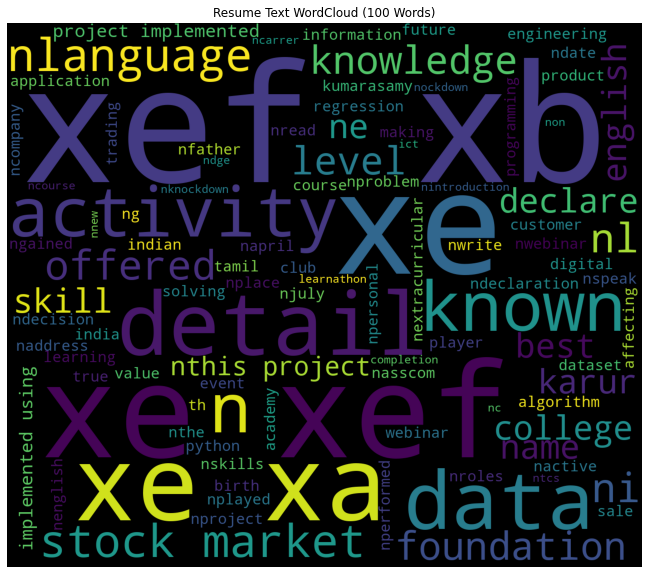

In [33]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()


In [34]:
import pickle
file=open('skilltext','rb')
data=pickle.load(file)
file.close()
print(data)

['auditing', 'autocad', 'automotive', 'art', 'analytical', 'skills', 'adobe', 'photoshop', 'art', 'direction', 'automation', 'adobe', 'illustrator', 'agile', 'methodologies', 'business', 'analysis', 'budgeting', 'business', 'strategy', 'business', 'process', 'improvement', 'business', 'services', 'business', 'planning', 'branding', 'business', 'intelligence', 'business', 'process', 'customer', 'service', 'communication', 'company', 'research', 'change', 'management', 'coaching', 'construction', 'customer', 'relationship', 'management', 'contractual', 'agreements', 'customer', 'satisfaction', 'contract', 'negotiation', 'design', 'databases', 'data', 'analysis', 'data', 'science', 'digital', 'marketing', 'decision', 'making', 'digital', 'media', 'drawing', 'development', 'tools', 'event', 'planning', 'editing', 'entrepreneurship', 'email', 'employee', 'benefits', 'design', 'energy', 'electronics', 'enterprise', 'software', 'ecommerce', 'finance', 'financial', 'analysis', 'fundraising', '

In [35]:
val=[]
for i in x_cleaned:
    count=0
    for y in i:
        if y in data:
            count+=1
    val.append(count)
print(val)
            
        

[13, 18, 10, 7, 12]


In [36]:
df['val']=val

In [37]:
#df.drop(['validation'],axis=1,inplace=True)

In [38]:
df

,resume_id,resume_data,val
0,0,ncourse completion nnew india learnathon ...,13
1,1,nproject xe xa nmini shopping website ...,18
2,2,nproject title xe nblack friday da ntaset ...,10
3,3,completed business english preliminary exam ni...,7
4,4,ncompany ninsplore consultants pvt ltd napri...,12


In [39]:
df['status']=0

In [40]:
df

,resume_id,resume_data,val,status
0,0,ncourse completion nnew india learnathon ...,13,0
1,1,nproject xe xa nmini shopping website ...,18,0
2,2,nproject title xe nblack friday da ntaset ...,10,0
3,3,completed business english preliminary exam ni...,7,0
4,4,ncompany ninsplore consultants pvt ltd napri...,12,0


In [41]:
df['status']=np.where(df['val']<10,0,df['status'])
df['status']=np.where(df['val']>=10,1,df['status'])

In [42]:
df

,resume_id,resume_data,val,status
0,0,ncourse completion nnew india learnathon ...,13,1
1,1,nproject xe xa nmini shopping website ...,18,1
2,2,nproject title xe nblack friday da ntaset ...,10,1
3,3,completed business english preliminary exam ni...,7,0
4,4,ncompany ninsplore consultants pvt ltd napri...,12,1


In [43]:
b=np.array(df.val).reshape(-1,1)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_x, test_x, train_y, test_y = train_test_split(b, df.status, random_state=0)
train_x.shape, test_x.shape, train_y.shape, test_y.shape 

((3, 1), (2, 1), (3,), (2,))

In [46]:
from sklearn.ensemble import RandomForestClassifier  
model= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
model.fit(train_x,train_y)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [47]:
y_pred= model.predict(test_x) 

In [48]:
print(y_pred)

[1 1]


In [49]:
print(test_y)

2    1
0    1
Name: status, dtype: int64


In [50]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 
cm= confusion_matrix(test_y, y_pred)  
cm

array([[2]], dtype=int64)

In [51]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [52]:
print(accuracy_score(test_y,y_pred))

1.0


In [77]:
#pip install gensim

In [78]:
import gensim
import string
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from gensim.models.phrases import Phraser, Phrases

In [79]:
with open('C:\\Users\\admin\\Desktop\\Imarticus\\skills.txt') as f:
    content2 = f.read()
ntexts=[]
l=len(x)
for j in range(l):
    s=x[j]
    res = [i for i in s if i not in content2]
    ntexts.append(res)

 

In [80]:
print(len(ntexts))
x=ntexts
x

5


[['ncourse',
  'completion',
  'nnew',
  'india',
  'learnathon',
  'ict',
  'academy',
  'ncarrer',
  'ndge',
  'nknockdown',
  'nockdown',
  'ntcs',
  'non',
  'nintroduction',
  'nybers',
  'necurity',
  'course',
  'offered',
  'cisco',
  'networking',
  'academy',
  'nfoundations',
  'artific',
  'nia',
  'intelli',
  'nence',
  'big',
  'data',
  'foundation',
  'offered',
  'nasscom',
  'foundation',
  'nworkshops',
  'nwebinars',
  'nadditive',
  'manufacturing',
  'nams',
  'hyrel',
  'printing',
  'equipment',
  'nheld',
  'nedii',
  'nabirf',
  'university',
  'college',
  'nngineering',
  'trichy',
  'nrecent',
  'trends',
  'digital',
  'signal',
  'processing',
  'using',
  'scilab',
  'nwebinar',
  'held',
  'kumarasamy',
  'college',
  'engineering',
  'karur',
  'nthe',
  'future',
  'mobile',
  'app',
  'industry',
  'webinar',
  'offered',
  'huawei',
  'developers',
  'ninternships',
  'achievements',
  'ncybersecurity',
  'virtual',
  'internship',
  'offered',
  '

In [81]:
common_words = ["of", "with", "without", "and", "or", "the", "a"]
n=ntexts

phrases = Phrases(n,connector_words=common_words)
bigram = Phraser(phrases)
sentences = list(bigram[n])
model=gensim.models.Word2Vec(sentences,min_count=2,workers=4,window=4)
wrds=list(model.wv.index_to_key)
model.save("Resume.model")
print(len(wrds))
print(wrds)

76
['xe', 'xef_xb', 'xa', 'details', 'known', 'project', 'market', 'activities', 'data', 'stock', 'foundation', 'level', 'using', 'offered', 'knowledge', 'implemented', 'name', 'nlanguages', 'declare', 'english', 'nthis', 'best', 'skills', 'college', 'karur', 'information', 'naddress', 'academy', 'course', 'ndeclaration', 'nasscom', 'digital', 'kumarasamy', 'engineering', 'indian', 'club', 'birth', 'ndate', 'nthe', 'future', 'webinar', 'applications', 'npersonal', 'nactive', 'affecting', 'true', 'solving', 'trading', 'ngained', 'sales', 'nroles', 'ncompany', 'programming', 'nenglish', 'nspeak', 'nwrite', 'nread', 'nlanguage', 'making', 'ndecision', 'nproblem', 'nplace', 'nskills', 'nplayed', 'nextracurricular', 'nperformed', 'product', 'dataset', 'regression', 'tamil', 'nfather', 'napril', 'njuly', 'learning', 'nproject', 'india']


#### Testing

In [82]:
z=model.wv.most_similar("project")
z

[('learning', 0.31164661049842834),
 ('regression', 0.2846786677837372),
 ('nplace', 0.1942804902791977),
 ('dataset', 0.18235374987125397),
 ('level', 0.17692352831363678),
 ('nasscom', 0.16851229965686798),
 ('known', 0.14363300800323486),
 ('details', 0.14168642461299896),
 ('making', 0.1361498385667801),
 ('tamil', 0.12102248519659042)]

In [83]:
import spacy
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
from spacy.matcher import PhraseMatcher

In [84]:
#conda install -c conda-forge spacy

In [85]:
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [86]:
def  profile(file):
    model=Word2Vec.load("Resume.model")
    text = str(pdfextract(file))
    text = text.replace("\\n", "")
    text = text.lower()
    
    Dataset = [nlp(text[0]) for text in model.wv.most_similar("dataset")]
    Digital = [nlp(text[0]) for text in model.wv.most_similar("digital")]
    Solving = [nlp(text[0]) for text in model.wv.most_similar("solving")]
     
    Python = [nlp(text[0]) for text in model.wv.most_similar("data")]
    Data_Engineering = [nlp(text[0]) for text in model.wv.most_similar("sales")]
    print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")
    
    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Dataset', None, *Dataset)
    matcher.add('Digital', None, *Digital)
    matcher.add('Solving', None, *Solving)
    matcher.add('Python', None, *Python)
    matcher.add('Data', None, *Data_Engineering)
    doc = nlp(text)
    
    d = []  
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]
        span = doc[start : end] 
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    print("KEYWORDS")
    print(keywords)
    
    ## convertimg string of keywords to dataframe
    
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")
    print(df)
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
    
    name = filename.split('_')
    print(name)
    name2 = name[0]
    name2 = name2.lower()
    
    ## converting str to dataframe
    
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)
    print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")
    print(dataf)

    return(dataf)

In [87]:
final_db=pd.DataFrame()
i=0
while i < len(myfiles):
    file=myfiles[i]
    data=profile(file)

    final_db=final_db.append(data)
    i+=1

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
KEYWORDS
Solving academy (2)
Python academy (2)
Digital college (3)
Data webinar (2)
Solving future (2)
Data future (2)
Dataset skills (1)
Digital skills (1)
Digital activities (1)
Data club (2)
Data details (1)
Digital true (1)
Digital best (1)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
             Keywords_List
0      Solving academy (2)
1       Python academy (2)
2      Digital college (3)
3         Data webinar (2)
4       Solving future (2)
5          Data future (2)
6       Dataset skills (1)
7       Digital skills (1)
8   Digital activities (1)
9            Data club (2)
10        Data details (1)
11        Digital true (1)
12        Digital best (1)
['DEEPIKA']
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
   Candidate Name  Subject      Keyword Count
0         deepika  Solving     academy      2
1         deepika   Python     academy      2
2         deepika  Digital     college      3
3         de

In [88]:
final_db2 = final_db['Keyword'].groupby([final_db['Candidate Name'], final_db['Subject']]).count().unstack()
final_db2.reset_index(inplace = True)
final_db2.fillna(0,inplace=True)
candidate_data = final_db2.iloc[:,1:]
candidate_data.index = final_db2['Candidate Name']
#the candidate profile in a csv format
cand=candidate_data.to_csv('candidate_profile.csv')
cand_profile=pd.read_csv('candidate_profile.csv')
cand_profile

,Candidate Name,Data,Dataset,Digital,Python,Solving
0,deepika,4.0,1.0,5.0,1.0,2.0
1,gowri,3.0,5.0,5.0,0.0,0.0
2,kaviya,2.0,5.0,2.0,1.0,3.0
3,sowmya,2.0,2.0,1.0,1.0,0.0
4,yash gupta,0.0,2.0,2.0,3.0,3.0
